Classe prevista para nova empresa: 1 (Atraente)


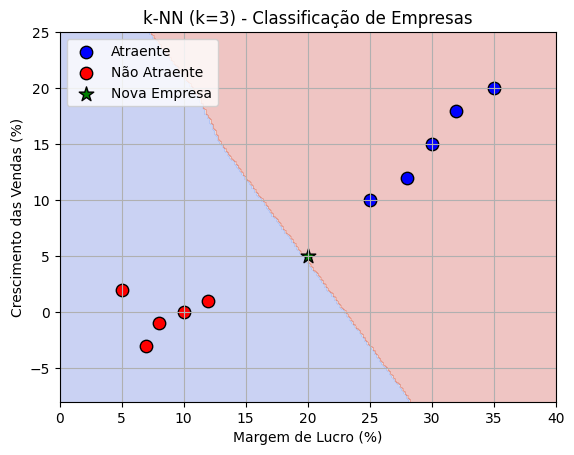

In [30]:
# ================================================
# Exemplo intuitivo de k-NN para Gestão e Ciência de Dados
# Objetivo: Classificar empresas como "Atraente" ou "Não Atraente"
# com base em:
#   - Margem de Lucro (%)
#   - Crescimento das Vendas (%)
# ================================================

# ---- Importações necessárias ----
import numpy as np                      # Biblioteca para arrays e operações numéricas
import matplotlib.pyplot as plt          # Biblioteca para gráficos
from sklearn.neighbors import KNeighborsClassifier  # Classe do k-NN no scikit-learn

# ---- 1) Criar dados fictícios ----
# Cada linha de X representa uma empresa: [margem_lucro, crescimento_vendas]
# Unidades: percentagem (%)
# Vamos criar 5 empresas "Atraentes" (classe = 1) e 5 "Não Atraentes" (classe = 0)

X = np.array([
    [30, 15],  # alta margem, bom crescimento  → Atraente
    [25, 10],
    [28, 12],
    [32, 18],
    [35, 20],
    [5,  2],   # baixa margem, baixo crescimento → Não Atraente
    [8, -1],
    [10, 0],
    [7, -3],
    [12, 1]
])

# Vetor de classes (labels) correspondente a cada linha de X
# 1 = Atraente, 0 = Não Atraente
y = np.array([1, 1, 1, 1, 1,   0, 0, 0, 0, 0])

# ---- 2) Criar e treinar o modelo k-NN ----
k = 3  # Número de vizinhos a considerar
knn = KNeighborsClassifier(n_neighbors=k)  # Criar classificador k-NN com k=3
knn.fit(X, y)  # Treinar o modelo com os dados (X, y)

# ---- 3) Novo caso a classificar ----
# Vamos prever a classe de uma nova empresa com:
# Margem de Lucro = 20%, Crescimento de Vendas = 5%
nova_empresa = np.array([[20, 5]])

# Obter a previsão do modelo (classe 0 ou 1)
classe_prevista = knn.predict(nova_empresa)[0]

# Mostrar no terminal a previsão e o significado
print(f"Classe prevista para nova empresa: {classe_prevista} "
      f"({'Atraente' if classe_prevista==1 else 'Não Atraente'})")

# ---- 4) Visualização intuitiva da fronteira de decisão ----

# Definir limites do gráfico (mínimos e máximos das variáveis, com folga)
margem_min, margem_max = X[:,0].min()-5, X[:,0].max()+5
cres_min, cres_max = X[:,1].min()-5, X[:,1].max()+5

# Criar uma grelha de pontos (meshgrid) que vai cobrir toda a área do gráfico
# Estes pontos servirão para desenhar as regiões de classificação
xx, yy = np.meshgrid(
    np.linspace(margem_min, margem_max, 200),   # eixo x: margem de lucro
    np.linspace(cres_min, cres_max, 200)        # eixo y: crescimento das vendas
)

# Para cada ponto da grelha, prever a classe com o modelo treinado
# np.c_ junta as coordenadas (xx, yy) numa matriz de pontos
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Reformatar Z para ter o mesmo formato que a grelha (xx, yy)
Z = Z.reshape(xx.shape)

# ---- 5) Desenhar o gráfico ----

# Desenhar as regiões coloridas de cada classe (fundo)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Desenhar os pontos das empresas Atraentes (azul)
plt.scatter(X[y==1, 0], X[y==1, 1],
            c='blue', label="Atraente", edgecolors='k', s=80)

# Desenhar os pontos das empresas Não Atraentes (vermelho)
plt.scatter(X[y==0, 0], X[y==0, 1],
            c='red', label="Não Atraente", edgecolors='k', s=80)

# Desenhar a nova empresa (verde, formato estrela)
plt.scatter(nova_empresa[0,0], nova_empresa[0,1],
            c='green', edgecolors='k', s=120, marker='*', label="Nova Empresa")

# Títulos e rótulos dos eixos
plt.xlabel("Margem de Lucro (%)")
plt.ylabel("Crescimento das Vendas (%)")
plt.title(f"k-NN (k={k}) - Classificação de Empresas")

# Mostrar legenda e grelha
plt.legend()
plt.grid(True)

# Mostrar o gráfico final
plt.show()
